### 1) Get the data

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('train.csv',index_col=0,parse_dates=True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [3]:
df['Month']=df.index.month
df['day']=df.index.day
df['year']=df.index.year
df['week']=df.index.weekofyear
df['weekday']=df.index.weekday
df['hour']=df.index.hour
df['weekday name']=df.index.day_name()
df.head()

C:\Users\mkhorasa\AppData\Local\Temp/ipykernel_2800/1396845447.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week']=df.index.weekofyear


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,day,year,week,weekday,hour,weekday name
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011,52,5,0,Saturday
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,52,5,1,Saturday
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011,52,5,2,Saturday
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011,52,5,3,Saturday
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011,52,5,4,Saturday



in order to count the NaN values: 

In [81]:
df.isnull().sum()

season          0
holiday         0
workingday      0
weather         0
temp            0
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
count           0
Month           0
day             0
year            0
week            0
weekday         0
hour            0
weekday name    0
dtype: int64

In [88]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [4]:
df['weather_corrected']=df["weather"].replace(to_replace=4, value=3)

In [5]:
df["weather_corrected"].value_counts()

1    7192
2    2834
3     860
Name: weather_corrected, dtype: int64

In [6]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,day,year,week,weekday,hour,weekday name,weather_corrected
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011,52,5,0,Saturday,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,52,5,1,Saturday,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011,52,5,2,Saturday,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011,52,5,3,Saturday,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011,52,5,4,Saturday,1


<AxesSubplot:>

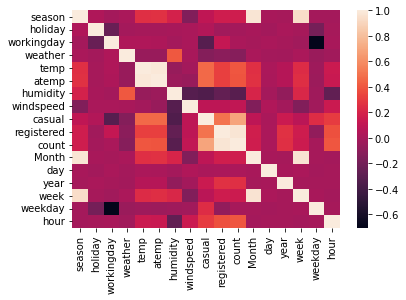

In [51]:
import seaborn as sns
sns.heatmap(df.corr())

### 2) Define X and Y

it looks like weekends are not count as holidays so here i chose to eliminate holiday and weekday and wtay with working day as the important feature

In [23]:
X1=df[['Month','workingday','weather_corrected','temp','humidity','windspeed','hour','year']]
y1=df['registered']

In [24]:
X2=df[['Month','workingday','weather_corrected','temp','humidity','windspeed','hour','year']]
y2=df['casual']

### 3) Train-Test Split

In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=100000)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=100000)

In [55]:
X1_train.shape

(8708, 8)

In [ ]:
X2_train.shape

### 4)EDA

In [ ]:
sns.scatterplot(data=df.loc['2011.02.01':'2011.02.07'], x='hour', y='count',hue='weekday')

### ???for the lighting talk: practice the animated plote from the count per hour for multiple day

here I want to select weekend days only

In [ ]:
df_filt_we=df[(df['weekday name']=='Saturday')| (df['weekday name']=='Sunday')]
df_filt_we["weekday name"].value_counts()


In [ ]:
df_filt_we.head()

filtering by workingday only:

In [ ]:
df_filt_work=df[(df['workingday']==1)]
df_filt_work.head()

In [ ]:
sns.scatterplot( x=df_filt_we.index, y='count', hue='season',data=df_filt_we)

In [ ]:
df_resamp_we_d=df_filt_we.resample('D').agg({'temp':'max','atemp':'mean','count':'max','season':'mean','holiday':'mean','workingday':'mean', 'weather':'mean','humidity':'mean', 'windspeed':'mean','casual':'max','registered':'max','day':'mean'})
sns.scatterplot( x=df_resamp_we_d.index, y='count', hue='season',data=df_resamp_we_d)

In [ ]:
sns.scatterplot( x=df_resamp_we_d.index, y='count', hue='humidity',data=df_resamp_we_d)

In [ ]:
sns.scatterplot( x=df_resamp_we_d.index, y='count', hue='windspeed',data=df_resamp_we_d)

now I evaluate data for weekdays:

In [ ]:
sns.heatmap(df_filt_we.corr())

In [ ]:
sns.heatmap(df_resamp_we_d.corr())

Plots:

In [ ]:
sns.scatterplot(data=df.loc['2011.02.01':'2011.02.20'], x='hour', y='count',hue='weekday')

In [ ]:
sns.scatterplot(data=df_filt_we.loc['2011.02.01':'2011.02.07'], x='hour', y='count',hue='temp')

<AxesSubplot:xlabel='Month', ylabel='casual'>

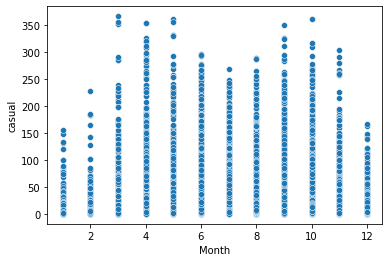

In [53]:
sns.scatterplot(data=df, x='Month', y='casual')

<AxesSubplot:xlabel='hour', ylabel='registered'>

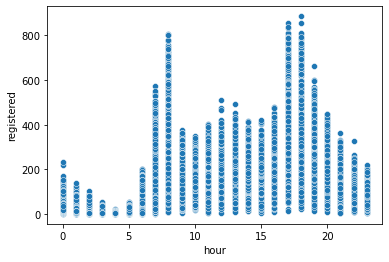

In [51]:
sns.scatterplot(data=df, x='hour', y='registered')

In [ ]:
sns.scatterplot(data=df, x='temp', y='casual',hue='workingday')

In [ ]:
sns.scatterplot(data=df, x='temp', y='registered',hue='workingday')

In [ ]:
sns.scatterplot(data=df, x='humidity', y='casual',hue='workingday')

In [ ]:
sns.scatterplot(data=df, x='humidity', y='registered',hue='workingday')

In [ ]:
sns.barplot(data=df, x='workingday', y='casual')

In [ ]:
sns.barplot(data=df, x='workingday', y='registered')

In [ ]:
sns.barplot(data=df, x='season', y='registered')

In [ ]:
sns.barplot(data=df, x='season', y='casual')

In [ ]:
sns.scatterplot(data=df, x='atemp', y='registered',hue='hour')

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

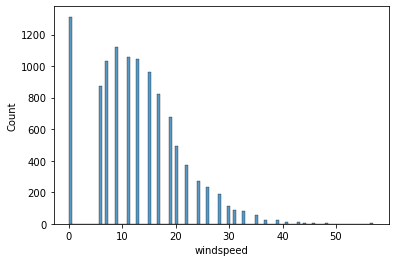

In [105]:
sns.histplot(data=df,x='windspeed',bins=100
)

<AxesSubplot:xlabel='windspeed', ylabel='casual'>

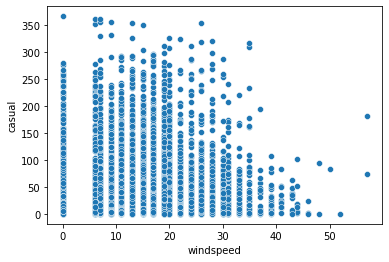

In [106]:
sns.scatterplot(data=df, x='windspeed', y='casual')

In [ ]:
sns.scatterplot(data=df, x='windspeed', y='registered')

In [ ]:
sns.histplot(data=df,x='temp',bins=10)

In [ ]:
sns.barplot(data=df, x='hour', y='casual')

In [ ]:
sns.barplot(data=df, x='hour', y='registered')

## Feature Engineering

In [ ]:
sns.barplot(data=df,x='weather', y='registered')

In [ ]:
sns.barplot(data=df,x='weather', y='casual')

In [ ]:
sns.barplot(data=df, x='Month', y='casual',hue='season')

In [ ]:
sns.barplot(data=df, x='Month', y='registered',hue='season')

In [ ]:
sns.barplot(data=df, x='year', y='registered')

In [ ]:
sns.barplot(data=df, x='year', y='casual')

## Feature Engineering for X1 :registered group

In [99]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression,PoissonRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV

In [74]:
#for X1:registered group
numeric_feat=['temp','humidity']
num_wind_feat=['windspeed']
periodic_feat=['hour']
cat_pass_feat=['workingday','weather_corrected','year','Month']

num_transformer=Pipeline([('scale',MinMaxScaler()),('poly',PolynomialFeatures(degree=10))])
wind_transformer=Pipeline([('biner',KBinsDiscretizer(n_bins=3, strategy='quantile')),('poly',PolynomialFeatures(degree=5))])
cat_transformer=Pipeline([('coder',OneHotEncoder())])
cat_pass_transformer=Pipeline([('coder',OneHotEncoder())])

In [75]:
trans_registered=ColumnTransformer([("num", num_transformer, numeric_feat),
('bin',wind_transformer,num_wind_feat),
('cat',cat_transformer,periodic_feat),
('cat_pass',cat_pass_transformer,cat_pass_feat)])

## Feature engineering for X2= casual

In [20]:
numeric_feat=['temp','humidity']
wind_feat=['windspeed']
categoric_feat=['Month','hour']
cat_pass_feat=['workingday','weather_corrected','year']

num_transformer=Pipeline([('scale',MinMaxScaler()),('poly',PolynomialFeatures(degree=10))])
wind_transformer=Pipeline([('biner',KBinsDiscretizer(n_bins=3)),('poly',PolynomialFeatures(degree=10))])
cat_transformer=Pipeline([('coder',OneHotEncoder()),('poly',PolynomialFeatures(degree=5))])
cat_pass_transformer=Pipeline([('coder',OneHotEncoder()),('poly',PolynomialFeatures(degree=2))])


In [21]:
trans_casual=ColumnTransformer([("num", num_transformer, numeric_feat),
('bin',wind_transformer,wind_feat),
('per',cat_transformer,periodic_feat),
('cat_pass',cat_pass_transformer,cat_pass_feat)])


In [114]:
#to check what the pipline does to a certain part of the detaframe:
#num_transformer.fit_transform(X)

ValueError: could not convert string to float: 'temp'

## pipelining, Fitting for X1:Registered

In [100]:
pipeline1 = make_pipeline(trans_registered,PoissonRegressor())
pipeline1.fit(X1_train, y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=10))]),
                                                  ['temp', 'humidity']),
                                                 ('bin',
                                                  Pipeline(steps=[('biner',
                                                                   KBinsDiscretizer(n_bins=3)),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5))]),
                                                  ['windspeed']),
                          

## pipelining, Fitting for X2: casual

In [91]:
pipeline2 = make_pipeline(trans_casual,Ridge())
pipeline2.fit(X2_train, y2_train)

KeyboardInterrupt: 

### Fit score: for registered X1

In [101]:
pipeline1.score(X1_train,y1_train)

0.7764275259136053

In [102]:
pipeline1.score(X1_test,y1_test)

0.7770260931916502

### Fit score: for casual X2

In [110]:
pipeline2.score(X2_train,y2_train)

-2.120138999108642e+123

In [111]:
pipeline2.score(X2_test,y2_test)

-2.006242570112113e+123

### optimization for registered X1:

In [103]:
pipeline1.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'poissonregressor', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__num', 'columntransformer__bin', 'columntransformer__cat', 'columntransformer__cat_pass', 'columntransformer__num__memory', 'columntransformer__num__steps', 'columntransformer__num__verbose', 'columntransformer__num__scale', 'columntransformer__num__poly', 'columntransformer__num__scale__clip', 'columntransformer__num__scale__copy', 'columntransformer__num__scale__feature_range', 'columntransformer__num__poly__degree', 'columntransformer__num__poly__include_bias', 'columntransformer__num__poly__interaction_only', 'columntransformer__num__poly__order', 'columntransformer__bin__memory', 'columntransformer__bin__steps', 'columntransformer_

In [104]:
param_grid={'poissonregressor__alpha':[0.001,0.01,0.1,1]}
grid_search=GridSearchCV(pipeline1,param_grid,)

In [105]:
grid_search.fit(X1_train,y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale 

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale',
                                                                                          MinMaxScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(degree=10))]),
                                                                         ['temp',
                                                                          'humidity']),
                                                                        ('bin',
                                                                         Pipeline(steps=[('biner',
                                                                                  

In [ ]:
pipeline.score(X2_train,y2_train)

In [ ]:
pipeline.fit(X1_train, y1_train)

In [ ]:
pipeline.score(X1_train,y1_train)

In [ ]:
pipeline.get_params().keys()

In [ ]:
param_grid={'lasso__alpha':[0.001,0.01,0.1,1]}
grid_search=GridSearchCV(pipeline,param_grid,)

In [ ]:
grid_search.fit(X2_train,y2_train)

In [106]:
grid_search.best_params_

{'poissonregressor__alpha': 0.001}

In [107]:
grid_search.best_estimator_.score(X1_train,y1_train)

0.820422559638049

In [108]:
grid_search.best_estimator_.score(X1_test,y1_test)

0.8196137779232748